# Load in Dataset and Tools

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [71]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 1AF1-3980

 Directory of C:\Users\mulli\Data-Science-Local-Copy\M01_project\Untitled Folder

06/15/2019  03:23 PM    <DIR>          .
06/15/2019  03:23 PM    <DIR>          ..
06/15/2019  02:07 PM    <DIR>          .ipynb_checkpoints
06/15/2019  02:46 AM            62,716 Data Cleaning.ipynb
06/15/2019  12:01 AM         3,707,090 df_truncated.pkl
06/15/2019  03:23 PM            78,286 EDA.ipynb
06/14/2019  06:12 PM         2,475,934 kc_house_data.csv
06/14/2019  07:20 PM         2,515,206 kc_house_data_orig.csv
               5 File(s)      8,839,232 bytes
               3 Dir(s)  79,518,388,224 bytes free


In [78]:
df = pd.read_pickle('df_truncated.pkl')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Pare down the data again

Let's see what tends to work with Price as it currently is by looking at some scater plots.

In [79]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.018183,0.003041,0.003900,-0.013662,-0.132794,0.019030,-0.003792,0.011086,-0.022093,0.006857,-0.012341,-0.005470,0.021251,-0.010933,-0.007295,-0.004350,0.021011,-0.004051,-0.138706
price,-0.018183,1.000000,0.310197,0.526757,0.702790,0.088384,0.255378,0.266549,0.393069,0.036172,0.667369,0.605928,0.322578,0.053578,0.118673,-0.052655,0.305339,0.021363,0.584449,0.082992
bedrooms,0.003041,0.310197,1.000000,0.515292,0.579209,0.033277,0.178470,-0.002238,0.078697,0.024718,0.358695,0.480913,0.298377,0.155592,0.017884,-0.153605,-0.011213,0.131210,0.393725,0.031209
bathrooms,0.003900,0.526757,0.515292,1.000000,0.755893,0.089415,0.503405,0.064271,0.186356,-0.127350,0.666684,0.687643,0.279170,0.507556,0.048092,-0.204253,0.023447,0.224609,0.569712,0.088926
sqft_living,-0.013662,0.702790,0.579209,0.755893,1.000000,0.175048,0.353515,0.105542,0.281639,-0.060849,0.763598,0.877094,0.430710,0.318392,0.051496,-0.200248,0.051286,0.241386,0.756825,0.185463
sqft_lot,-0.132794,0.088384,0.033277,0.089415,0.175048,1.000000,-0.006461,0.021831,0.072508,-0.008690,0.114243,0.184971,0.016874,0.052732,0.005127,-0.130296,-0.086335,0.231066,0.145821,0.722416
floors,0.019030,0.255378,0.178470,0.503405,0.353515,-0.006461,1.000000,0.020827,0.027113,-0.264980,0.458077,0.523214,-0.242274,0.489723,0.003511,-0.058612,0.048510,0.125942,0.278872,-0.009957
waterfront,-0.003792,0.266549,-0.002238,0.064271,0.105542,0.021831,0.020827,1.000000,0.386162,0.016854,0.083664,0.072314,0.083683,-0.024953,0.073715,0.029433,-0.012347,-0.038160,0.084777,0.030782
view,0.011086,0.393069,0.078697,0.186356,0.281639,0.072508,0.027113,0.386162,1.000000,0.045265,0.248821,0.165867,0.271289,-0.055311,0.092124,0.086199,0.006707,-0.078357,0.278246,0.071907
condition,-0.022093,0.036172,0.024718,-0.127350,-0.060849,-0.008690,-0.264980,0.016854,0.045265,1.000000,-0.147427,-0.159672,0.168836,-0.362460,-0.056253,0.003710,-0.015512,-0.106781,-0.092819,-0.003816


In [80]:
df['price'].describe()

count    2.105400e+04
mean     5.409961e+05
std      3.687586e+05
min      7.800000e+04
25%      3.225000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [81]:
df['price']=df['price']/10000
df['price'].describe()

count    21054.000000
mean        54.099605
std         36.875858
min          7.800000
25%         32.250000
50%         45.000000
75%         64.500000
max        770.000000
Name: price, dtype: float64

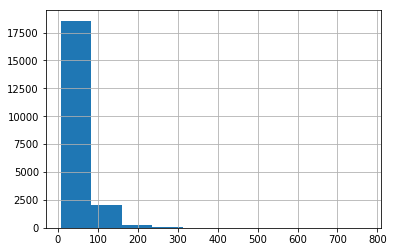

In [82]:
df['price'].hist()

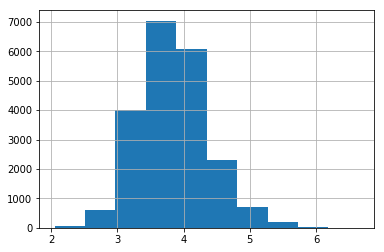

In [83]:
df['pricelog'] = np.log(df['price'])
df['pricelog'].hist()

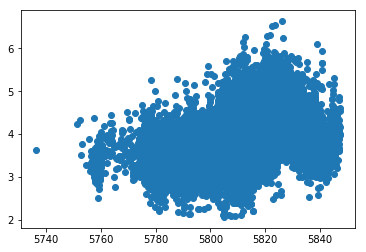

In [90]:
df['grg']=abs(df['lat']*df['long'])
plt.scatter(df['grg'],df['pricelog'])

In [96]:
df['long']=abs(df['long'])
df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pricelog,grg
id,1.000000,-0.018183,0.003041,0.003900,-0.013662,-0.132794,0.019030,-0.003792,0.011086,-0.022093,...,-0.005470,0.021251,-0.010933,-0.007295,-0.004350,-0.021011,-0.004051,-0.138706,-0.006103,-0.011282
price,-0.018183,1.000000,0.310197,0.526757,0.702790,0.088384,0.255378,0.266549,0.393069,0.036172,...,0.322578,0.053578,0.118673,-0.052655,0.305339,-0.021363,0.584449,0.082992,0.891452,0.264042
bedrooms,0.003041,0.310197,1.000000,0.515292,0.579209,0.033277,0.178470,-0.002238,0.078697,0.024718,...,0.298377,0.155592,0.017884,-0.153605,-0.011213,-0.131210,0.393725,0.031209,0.344334,-0.056195
bathrooms,0.003900,0.526757,0.515292,1.000000,0.755893,0.089415,0.503405,0.064271,0.186356,-0.127350,...,0.279170,0.507556,0.048092,-0.204253,0.023447,-0.224609,0.569712,0.088926,0.551478,-0.058253
sqft_living,-0.013662,0.702790,0.579209,0.755893,1.000000,0.175048,0.353515,0.105542,0.281639,-0.060849,...,0.430710,0.318392,0.051496,-0.200248,0.051286,-0.241386,0.756825,0.185463,0.695856,-0.039433
sqft_lot,-0.132794,0.088384,0.033277,0.089415,0.175048,1.000000,-0.006461,0.021831,0.072508,-0.008690,...,0.016874,0.052732,0.005127,-0.130296,-0.086335,-0.231066,0.145821,0.722416,0.099299,-0.158117
floors,0.019030,0.255378,0.178470,0.503405,0.353515,-0.006461,1.000000,0.020827,0.027113,-0.264980,...,-0.242274,0.489723,0.003511,-0.058612,0.048510,-0.125942,0.278872,-0.009957,0.309650,-0.001153
waterfront,-0.003792,0.266549,-0.002238,0.064271,0.105542,0.021831,0.020827,1.000000,0.386162,0.016854,...,0.083683,-0.024953,0.073715,0.029433,-0.012347,0.038160,0.084777,0.030782,0.172735,0.002401
view,0.011086,0.393069,0.078697,0.186356,0.281639,0.072508,0.027113,0.386162,1.000000,0.045265,...,0.271289,-0.055311,0.092124,0.086199,0.006707,0.078357,0.278246,0.071907,0.344498,0.033562
condition,-0.022093,0.036172,0.024718,-0.127350,-0.060849,-0.008690,-0.264980,0.016854,0.045265,1.000000,...,0.168836,-0.362460,-0.056253,0.003710,-0.015512,0.106781,-0.092819,-0.003816,0.038458,0.023854


In [101]:
df.drop(columns = ['id', 'condition', 'yr_built', 'zipcode', 'sqft_lot', 'sqft_lot15'], inplace = True)

In [104]:
df.drop(columns = ['date'], inplace=True)

In [106]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,pricelog,grg
0,22.19,3,1.00,1180,1.0,0.0,0.0,7,1180,0.0,0.0,47.5112,122.257,1340,3.099642,5808.576778
1,53.80,3,2.25,2570,2.0,0.0,0.0,7,2170,400.0,1991.0,47.7210,122.319,1690,3.985273,5837.184999
2,18.00,2,1.00,770,1.0,0.0,0.0,6,770,0.0,0.0,47.7379,122.233,2720,2.890372,5835.146731
3,60.40,4,3.00,1960,1.0,0.0,0.0,7,1050,910.0,0.0,47.5208,122.393,1360,4.100989,5816.213274
4,51.00,3,2.00,1680,1.0,0.0,0.0,8,1680,0.0,0.0,47.6168,122.045,1800,3.931826,5811.392356


In [107]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,pricelog,grg
price,1.000000,0.310197,0.526757,0.702790,0.255378,0.266549,0.393069,0.667369,0.605928,0.322578,0.118673,0.305339,-0.021363,0.584449,0.891452,0.264042
bedrooms,0.310197,1.000000,0.515292,0.579209,0.178470,-0.002238,0.078697,0.358695,0.480913,0.298377,0.017884,-0.011213,-0.131210,0.393725,0.344334,-0.056195
bathrooms,0.526757,0.515292,1.000000,0.755893,0.503405,0.064271,0.186356,0.666684,0.687643,0.279170,0.048092,0.023447,-0.224609,0.569712,0.551478,-0.058253
sqft_living,0.702790,0.579209,0.755893,1.000000,0.353515,0.105542,0.281639,0.763598,0.877094,0.430710,0.051496,0.051286,-0.241386,0.756825,0.695856,-0.039433
floors,0.255378,0.178470,0.503405,0.353515,1.000000,0.020827,0.027113,0.458077,0.523214,-0.242274,0.003511,0.048510,-0.125942,0.278872,0.309650,-0.001153
waterfront,0.266549,-0.002238,0.064271,0.105542,0.020827,1.000000,0.386162,0.083664,0.072314,0.083683,0.073715,-0.012347,0.038160,0.084777,0.172735,0.002401
view,0.393069,0.078697,0.186356,0.281639,0.027113,0.386162,1.000000,0.248821,0.165867,0.271289,0.092124,0.006707,0.078357,0.278246,0.344498,0.033562
grade,0.667369,0.358695,0.666684,0.763598,0.458077,0.083664,0.248821,1.000000,0.756526,0.167547,0.015604,0.112283,-0.199558,0.713609,0.703816,0.029546
sqft_above,0.605928,0.480913,0.687643,0.877094,0.523214,0.072314,0.165867,0.756526,1.000000,-0.049681,0.020508,-0.001530,-0.344556,0.732014,0.602175,-0.122735
sqft_basement,0.322578,0.298377,0.279170,0.430710,-0.242274,0.083683,0.271289,0.167547,-0.049681,1.000000,0.065543,0.109106,0.142755,0.200356,0.314367,0.147292


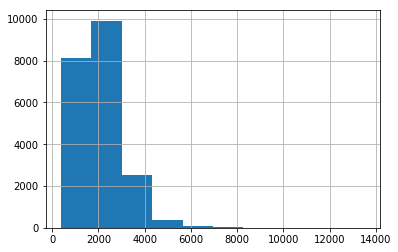

In [116]:
df['sqft_living'].hist()

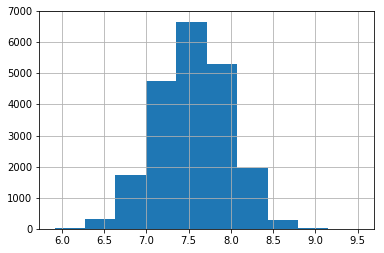

In [117]:
df['sqftlivinglog']=np.log(df['sqft_living'])
df['sqftlivinglog'].hist()

In [209]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,pricelog,grg
price,1.000000,0.310197,0.526757,0.702790,0.255378,0.266549,0.393069,0.667369,0.605928,0.322578,0.118673,0.305339,-0.021363,0.584449,0.891452,0.264042
bedrooms,0.310197,1.000000,0.515292,0.579209,0.178470,-0.002238,0.078697,0.358695,0.480913,0.298377,0.017884,-0.011213,-0.131210,0.393725,0.344334,-0.056195
bathrooms,0.526757,0.515292,1.000000,0.755893,0.503405,0.064271,0.186356,0.666684,0.687643,0.279170,0.048092,0.023447,-0.224609,0.569712,0.551478,-0.058253
sqft_living,0.702790,0.579209,0.755893,1.000000,0.353515,0.105542,0.281639,0.763598,0.877094,0.430710,0.051496,0.051286,-0.241386,0.756825,0.695856,-0.039433
floors,0.255378,0.178470,0.503405,0.353515,1.000000,0.020827,0.027113,0.458077,0.523214,-0.242274,0.003511,0.048510,-0.125942,0.278872,0.309650,-0.001153
waterfront,0.266549,-0.002238,0.064271,0.105542,0.020827,1.000000,0.386162,0.083664,0.072314,0.083683,0.073715,-0.012347,0.038160,0.084777,0.172735,0.002401
view,0.393069,0.078697,0.186356,0.281639,0.027113,0.386162,1.000000,0.248821,0.165867,0.271289,0.092124,0.006707,0.078357,0.278246,0.344498,0.033562
grade,0.667369,0.358695,0.666684,0.763598,0.458077,0.083664,0.248821,1.000000,0.756526,0.167547,0.015604,0.112283,-0.199558,0.713609,0.703816,0.029546
sqft_above,0.605928,0.480913,0.687643,0.877094,0.523214,0.072314,0.165867,0.756526,1.000000,-0.049681,0.020508,-0.001530,-0.344556,0.732014,0.602175,-0.122735
sqft_basement,0.322578,0.298377,0.279170,0.430710,-0.242274,0.083683,0.271289,0.167547,-0.049681,1.000000,0.065543,0.109106,0.142755,0.200356,0.314367,0.147292


In [119]:
df.drop(columns=['sqftlivinglog'], inplace=True)

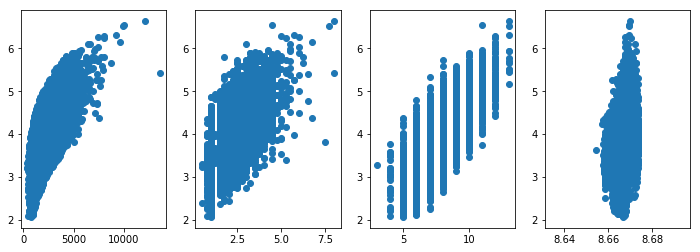

In [247]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,4,1)
ax1.scatter(df['sqft_living'],df['pricelog'])

ax2 = fig.add_subplot(1,4,2)
ax2.scatter(df['bathrooms'],df['pricelog'])

ax3 = fig.add_subplot(1,4,3)
ax3.scatter(df['grade'],df['pricelog'])

ax4 = fig.add_subplot(1,4,4)
ax4.scatter(df['grg'],df['pricelog'])

In [172]:
f='pricelog ~ sqft_living + bathrooms + grade'

In [250]:
model = ols(formula = 'pricelog ~ sqft_living + grade + waterfront + grg', data=df).fit()

In [251]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               pricelog   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                 1.311e+04
Date:                Sat, 15 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:58:33   Log-Likelihood:                -3212.2
No. Observations:               21054   AIC:                             6434.
Df Residuals:                   21049   BIC:                             6474.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -536.8969      5.163   -103.990      0.000    -547.017    -526.777
sqft_living     0.0002   3.29e-06     74.378      0.000       0.000       0.000
grade           0.1603      0.003     62.306      0.000       0.155       0.165
waterfront      0.6137      0.024     26.067      0.000       0.568       0.660
grg            62.1838      0.596    104.373      0.000      61.016      63.352
==============================================================================
Omnibus:                      306.282   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.816
Skew:                           0.145   Prob(JB):                    2.37e-105
Kurtosis:                       3.682   Cond. No.                     6.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [252]:
df['grg'].nunique()

20301

In [219]:
df['grg']=np.log(df['grg'])

In [220]:
df['grg'].describe()

count    21054.000000
mean         8.667762
std          0.003277
min          8.654574
25%          8.665403
50%          8.668138
75%          8.670676
max          8.673738
Name: grg, dtype: float64

In [224]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,pricelog,grg
price,1.000000,0.310197,0.526757,0.702790,0.255378,0.266549,0.393069,0.667369,0.605928,0.322578,0.118673,0.305339,-0.021363,0.584449,0.891452,0.264305
bedrooms,0.310197,1.000000,0.515292,0.579209,0.178470,-0.002238,0.078697,0.358695,0.480913,0.298377,0.017884,-0.011213,-0.131210,0.393725,0.344334,-0.056082
bathrooms,0.526757,0.515292,1.000000,0.755893,0.503405,0.064271,0.186356,0.666684,0.687643,0.279170,0.048092,0.023447,-0.224609,0.569712,0.551478,-0.058104
sqft_living,0.702790,0.579209,0.755893,1.000000,0.353515,0.105542,0.281639,0.763598,0.877094,0.430710,0.051496,0.051286,-0.241386,0.756825,0.695856,-0.039224
floors,0.255378,0.178470,0.503405,0.353515,1.000000,0.020827,0.027113,0.458077,0.523214,-0.242274,0.003511,0.048510,-0.125942,0.278872,0.309650,-0.001105
waterfront,0.266549,-0.002238,0.064271,0.105542,0.020827,1.000000,0.386162,0.083664,0.072314,0.083683,0.073715,-0.012347,0.038160,0.084777,0.172735,0.002484
view,0.393069,0.078697,0.186356,0.281639,0.027113,0.386162,1.000000,0.248821,0.165867,0.271289,0.092124,0.006707,0.078357,0.278246,0.344498,0.033601
grade,0.667369,0.358695,0.666684,0.763598,0.458077,0.083664,0.248821,1.000000,0.756526,0.167547,0.015604,0.112283,-0.199558,0.713609,0.703816,0.029760
sqft_above,0.605928,0.480913,0.687643,0.877094,0.523214,0.072314,0.165867,0.756526,1.000000,-0.049681,0.020508,-0.001530,-0.344556,0.732014,0.602175,-0.122558
sqft_basement,0.322578,0.298377,0.279170,0.430710,-0.242274,0.083683,0.271289,0.167547,-0.049681,1.000000,0.065543,0.109106,0.142755,0.200356,0.314367,0.147395


Really good results with using loggrg, logprice, sqft_living, grade, and waterfront
